### Risk in Project Planning

This notebook demonstrates how to model risk in project planning. Two primary sources of risk are:
- Time
- Cost

We'll focus on time as the project costing is dependent on the time it takes for completion.

The major risk in planning for project completion time are incorrect projections. Underestimating project duration can result in not only potential penalties but additional costs. On the otherhand over estimating project time could cost winning a project bid to start with!

Good knowledge of the project requirements, complexities and boundaries are required for a good projection (this is a worth an article on it's own). In the real world, it's difficult to anticipate every contingency, and even the best project planning will include some over- or underestimates.
It's common in project planning to produce multiple estimates for project completion time. Estimating best-case, worst-case, and expected estimates gives you a range of completion times tries to take into account the risk of unanticipated factors.

Though with practice and simple analytical techniques you can generally construct a reasonable estimate for project completion time.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as stats
%matplotlib inline

In [78]:
task = ['Task A', 'Task B', 'Task C']
best = [10, 2, 5]
expected =[20, 20, 20]
worst = [25, 30, 40]
df = pd.DataFrame()
df['Task'] = task
df['Best Guess'] = best
df['Expected'] = expected
df['Worst Guess'] = worst
df

,Task,Best Guess,Expected,Worst Guess
0,Task A,10,20,25
1,Task B,2,20,30
2,Task C,5,20,40


#### The Basic Project Plan
Consider a simple project plan (in the table above) with three tasks that can't be parallelized i.e. they need to be performed one after the other. Each of the tasks has a*:
 - Best Guess: The minimum number of days it takes to complete the task.
 - Expected: The 'on average' number of days it takes to complete the task.
 - Worst Guess: The maximum number of days it takes to complete the task.

You obtain these estimates from whomever is going to be executing these tasks*.

#### A First Pass on Estimating the Lifespan of the Project
One approach to estimate the lifespan of the project is to sum up the best, expected and worst guesses of time required independently:
 - Best Guess Total: 22 days
 - Expected: 60 days
 - Worst Guess: 95 days
 
The average project planners would pat themselves on the back and have a beer. On average the average planners are wrong all the time

#### Being Better than Average with Monte Carlo Simulation!
Imagine being able to perform this project in multiple parallel universes and collect the time it takes to complete these project then go back in time with this knowledge? You'd now have a better idea of how long the tasks takes? You would be able learn from your data, the minimum, average and maximum time the project might take.
Monte Carlo simulation is the next best thing!

#### Focussing on One Task - Task B 
Note: One can only focus on one thing at a time, else it would not be called 'focussing'.

Lets focus on Task be where it the lowest time estimate is 2 days, the expected is 20 days and the worst case scenario is it takes 30 days.
We will now 'simulate' the number of days this project is supposed to take. Here this is achieved using a random number generator from a triangular distribution (one could also use a PERT distribution from the beta distribution family). 

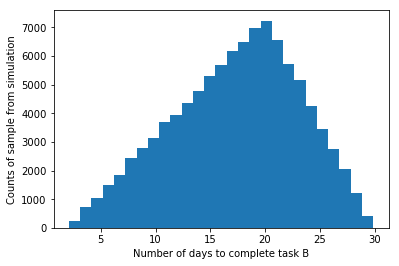

In [79]:
number_of_simulations = 100000 # number of simulations to run
task_B = np.random.triangular(2, 20, 30, number_of_simulations) # generate number of days required for task B
n_bins = int(np.max(task_B) - np.min(task_B))
tmp = plt.hist(task_B, bins = n_bins)
plt.xlabel('Number of days to complete task B')
plt.ylabel('Counts of sample from simulation')

The histogram above shows the result of simulating the time taken to complete task B. Where simulating is achieved by drawing out random numbers from the triangular distribution. Think of it as each draw is from a parallel universe!

In [87]:
print('Simulated minimum number of days to complete task B: ' + str(np.min(task_B)))
print('Simulated average number of days to complete task B: ' + str(np.mean(task_B)))
print('Simulated maximum number of days to complete task B: ' + str(np.max(task_B)))

Simulated minimum number of days to complete task B: 2.081292343109545
Simulated average number of days to complete task B: 17.349738904852828
Simulated maximum number of days to complete task B: 29.88365546454595


#### The Triangular Distribution has a Skew - It's not Symmetrical
As the estimation for the task is not symmetric, at best it takes 2 days on average and at worse it takes 20 and 30 day. The distribution is skewed towards the right, emphasizing that the task is more likely to take a longer time as opposed to a shorter time. This property is shown below with a symmetric normal curve fitted to the simulated data. 

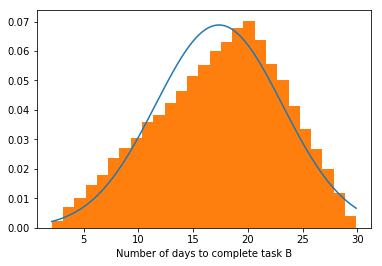

In [89]:
h = sorted(task_B)
n_bins = int(np.max(task_B) - np.min(task_B))
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
tmp = plt.plot(h,fit,'-')
tmp = plt.hist(task_B, bins = n_bins, normed = True)
plt.xlabel('Number of days to complete task B')

#### Conclusions from Simulating a Single Task
So far:
1. We have simulated a task where the results show that at best can be completed in 2 days, at worse in 30 days and on average in 17 days (not 20 as first estimated).
2. The simulated result is skewed to the right, supporting the estimate that it will tend to take longer than shorter on average, i.e. the effort in days not normally distributed.

#### How About Simulating all the Tasks Independently and Adding the Time Required?
In order to estimate the project as a whole we'll now simulate all the tasks and sum the time required. This will give use a distribution of the time required for the project as a whole.

In [94]:
num_sim = 100000 # Number of simulations to run
taskA_samples = np.random.triangular(10, 20, 25, num_sim) # generate number of days to complete task
taskB_samples = np.random.triangular(2, 20, 30, num_sim)
taskC_samples = np.random.triangular(5, 20, 40, num_sim)

proj_samples = [] # store the sum of days for all tasks for each simulation
for i in range(0, num_sim):
    proj_samples.append(taskA_samples[i] + taskB_samples[i] + taskC_samples[i])

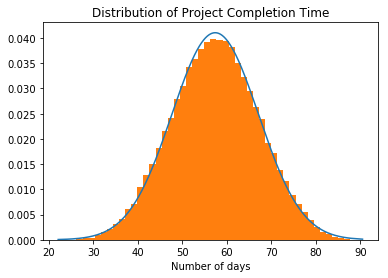

In [95]:
h = sorted(proj_samples)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
tmp = plt.plot(h,fit,'-')
tmp = plt.hist(h,bins = 50, normed=True)      #use this to draw histogram of your data
plt.title('Distribution of Project Completion Time')
plt.xlabel('Number of days')

In [104]:
print('Minimum number of days to project completion ' + str(np.ceil(np.min(proj_samples))))

Minimum number of days to project completion 23.0


In [106]:
print('Mean number of days to project completion ' + str(np.floor(np.mean(proj_samples))))

Mean number of days to project completion 57.0


In [107]:
print('Maximum number of days to project completion ' + str(np.ceil(np.max(proj_samples))))

Maximum number of days to project completion 91.0


#### The Total Project Time Frame is Normally Distributed?!
Independently each task was not symmetric though after sampling and summing them to generate a distribution of project time frame, the resultant estimate is nearly normally distributed! With this property we could use the normal distribution property to assign probabilities to the exact completion time frame. That is a topic deserving another post!

Note that here the minimum, average expected and maximum number of days required for the project here slightly differs from the simple summing. These differences will be amplified with an increas in number of tasks and skew of each task estimate.

Hopefully you find this post useful!

#### Useful references:
- https://pubsonline.informs.org/doi/pdf/10.1287/ited.1080.0013
- https://www.riskamp.com/monte-carlo-simulation-in-project-planning#note-1